# Continuous Field Models

## Reaction-Diffusion Systems

$$
\begin{align}
\frac{\partial f_1}{\partial t} & = R_1(f_1, f_2, \ldots, f_n) + D_1\nabla^2f_1 \\
\frac{\partial f_2}{\partial t} & = R_2(f_1, f_2, \ldots, f_n) + D_2\nabla^2f_2 \\
&\vdots\\
\frac{\partial f_n}{\partial t} & = R_n(f_1, f_2, \ldots, f_n) + D_n\nabla^2f_n \\
\end{align}
$$

- Reaction terms $R_i(\cdots)$ describe only local dynamics without any spatial derivatives involved.
- Diffusion terms ($D_i\nabla^2f_i$) are strictly limited to the Laplacian of the state variable itself.

### Turing pattern formation
$$
\begin{align}
\frac{\partial u}{\partial t} &= a(u - h) + b(v - k) + D_u \nabla^2u\\
\frac{\partial v}{\partial t} &= c(u - h) + d(v - k) + D_v \nabla^2v
\end{align}
$$

Discretize the first equation:
$$\begin{align}
\frac{\partial u}{\partial t} &= a(u - h) + b(v - k) + D_u \nabla^2u\\
&= a(u - h) + b(v - k) + D_u (\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2})\\
\end{align}$$

So

$$\begin{align}
u(x,y,t+\Delta t) &\approx u(x, y, t) \\ &+ \left(a(u(x, y, t) - h) + b(v(x, y, t) - k) + D_u\frac{u(x+\Delta h, y, t) + u(x-\Delta h, y, t) + u(x, y+\Delta h, t)+u(x, y-\Delta h, t) -4u(x, y, t)}{\Delta h^2}\right)\Delta t\\
\end{align}$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

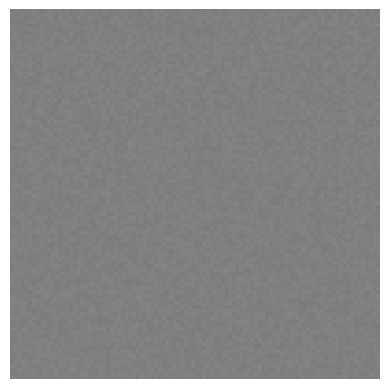

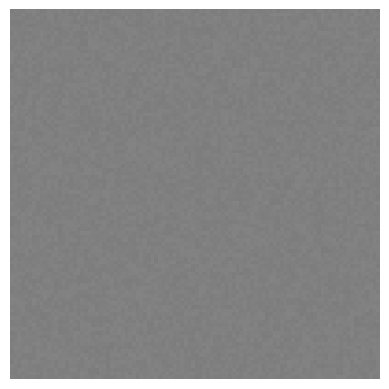

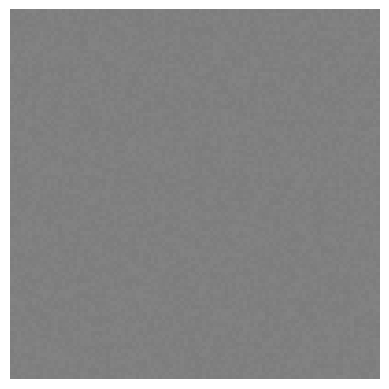

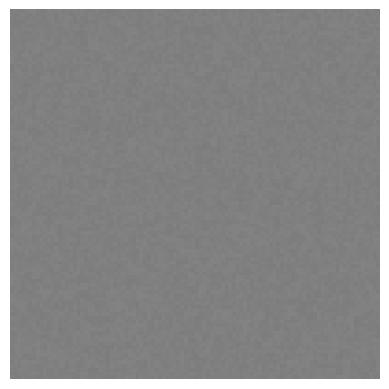

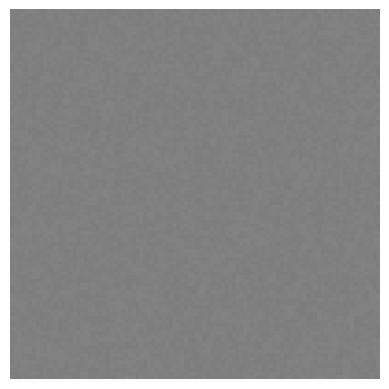

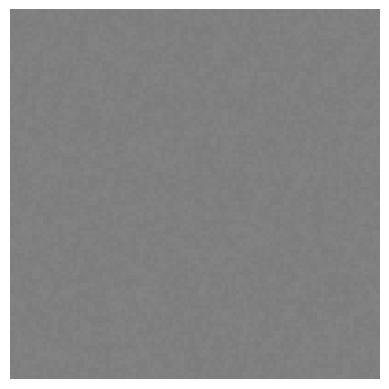

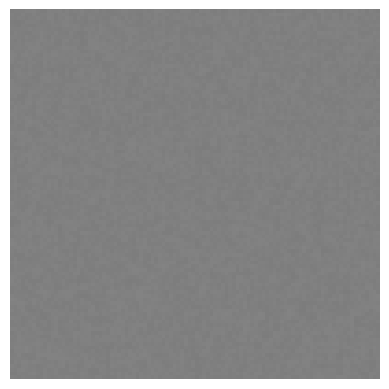

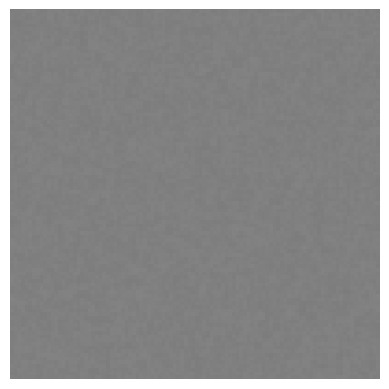

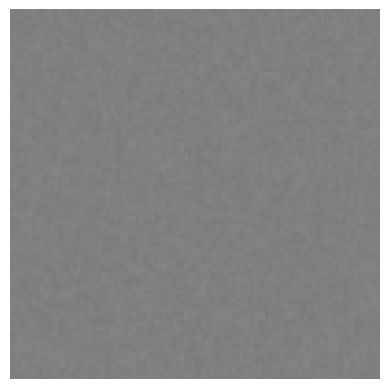

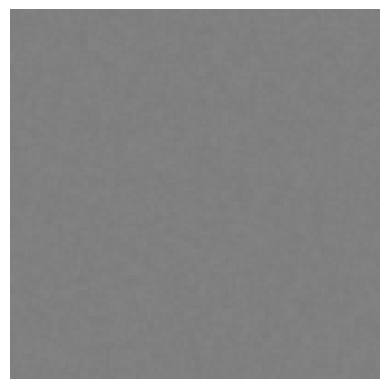

In [16]:
n = 100 # size of grid: n * n
Dh = 1. / n # spatial resolution, assuming space is [0,1] * [0,1]
Dt = 0.02 # temporal resolution
a, b, c, d, h, k = 1., -1., 2., -1.5, 1., 1. # parameter values
Du = 0.0001 # diffusion constant of u
Dv = 0.0006 # diffusion constant of v

u = 1. + np.random.uniform(-0.03, 0.03, [n, n])
v = 1. + np.random.uniform(-0.03, 0.03, [n, n])

nextu = np.zeros([n, n])
nextv = np.zeros([n, n])

for _ in range(10):
    for x, y in list(product(range(n), range(n))):
        # state-transition function
        uC, uR, uL, uU, uD = u[x,y], u[(x+1)%n,y], u[(x-1)%n,y], u[x,(y+1)%n], u[x,(y-1)%n]
        vC, vR, vL, vU, vD = v[x,y], v[(x+1)%n,y], v[(x-1)%n,y], v[x,(y+1)%n], v[x,(y-1)%n]

        uLap = (uR + uL + uU + uD - 4 * uC) / (Dh**2)
        vLap = (vR + vL + vU + vD - 4 * vC) / (Dh**2)

        nextu[x,y] = uC + (a*(uC-h) + b*(vC-k) + Du * uLap) * Dt # discretized version of u center
        nextv[x,y] = vC + (c*(uC-h) + d*(vC-k) + Dv * vLap) * Dt # discretized version of v center

    u, nextu = nextu, u
    v, nextv = nextv, v

    plt.imshow(u, vmin = 0, vmax = 2, cmap = plt.cm.binary)
    plt.axis(False)
    plt.show()

In [3]:
from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')

In [13]:
n = 80 # size of grid: n * n
Dh = 1. / n # spatial resolution, assuming space is [0,1] * [0,1]
Dt = 0.02 # temporal resolution
a, b, c, d, h, k = 1., -1., 2., -1.5, 1., 1. # parameter values
Du = 0.0001 # diffusion constant of u
Dv = 0.0006 # diffusion constant of v

u = 1. + np.random.uniform(-0.1, 0.1, [n, n])
v = 1. + np.random.uniform(-0.1, 0.1, [n, n])

fig = plt.figure(figsize=(5, 5))
im = plt.imshow(u, vmin = 0, vmax = 2)
plt.axis(False)
plt.close()

nextu = np.zeros([n, n])
nextv = np.zeros([n, n])

def drawframe(*args):
    for x, y in list(product(range(n), range(n))):
        # state-transition function
        global u, v, nextu, nextv
        uC, uR, uL, uU, uD = u[x,y], u[(x+1)%n,y], u[(x-1)%n,y], u[x,(y+1)%n], u[x,(y-1)%n]
        vC, vR, vL, vU, vD = v[x,y], v[(x+1)%n,y], v[(x-1)%n,y], v[x,(y+1)%n], v[x,(y-1)%n]

        uLap = (uR + uL + uU + uD - 4 * uC) / (Dh**2)
        vLap = (vR + vL + vU + vD - 4 * vC) / (Dh**2)

        nextu[x,y] = uC + (a*(uC-h) + b*(vC-k) + Du * uLap) * Dt
        nextv[x,y] = vC + (c*(uC-h) + d*(vC-k) + Dv * vLap) * Dt

    u, nextu = nextu, u
    v, nextv = nextv, v
    
    im.set_array(u)
    
    return im,

In [14]:
anim = animation.FuncAnimation(fig, drawframe, frames=1000, interval=20, blit=True)

In [15]:
anim

##  Finding Equilibrium States

The equilibrium state of an autonomous continuous field model

$$\frac{\partial f}{\partial t} = F\left(f, \frac{\partial f}{\partial x}, \frac{\partial^2 f}{\partial x^2},\cdots\right)$$

is given as a static spatial function $f_{eq}(x)$, which satisfies

$$0 = F\left(f_{eq}, \frac{\partial f_{eq}}{\partial x}, \frac{\partial^2 f_{eq}}{\partial x^2},\cdots\right)$$

Consider

$$\frac{\partial c}{\partial t} = D\nabla^2c+sin(x);\ (-\pi\leq x\leq \pi)$$

This equation is a non-autononous system because the independent variable $x$ appears explicitly on the right hand side. But we can eliminate it by replacing $x$ with a new state variable $y$ that satistifies
$$\begin{align}
\frac{\partial y}{ \partial t} &= 0\\
y(x, 0) &= x
\end{align}$$

So
$$\begin{align}
0 &= D\nabla^2c_{eq}+sin(x)\\
 &= D \frac{d^2c_{eq}}{dx^2}+sin(x)
\end{align}$$

The solution is (use integral)

$$c_{eq}(x) = \frac{\sin(x)}{D} + C_1x + C_2$$